In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [81]:
path = 'https://raw.githubusercontent.com/edyoda/Data-Scientist-program/master/Practice%20Problems/data/student-mat.csv'

In [82]:
def load_data(path):
    df = pd.read_csv(path, sep=';')
    return df

In [83]:
df = load_data(path)

In [84]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Q1. Add average marks section ?

In [85]:
def add_avg_marks(df):
    df['average_marks'] = df[['G1', 'G2', 'G3']].apply(lambda x: (x['G1'] + x['G2'] + x['G3']) / 3, axis=1)
    return df

In [86]:
df = add_avg_marks(df)

In [87]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average_marks
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


#### Q2. Plot the relationship between romantic & average marks ?

In [88]:
def plot_relationship_marks_graph(df):
    sns.catplot(x='romantic', y='average_marks', data=df)
    return plt

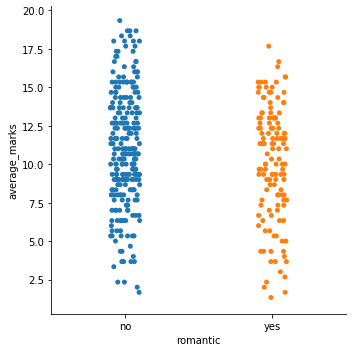

In [89]:
plt = plot_relationship_marks_graph(df)
plt.show()

#### Q3. Does the data have any missing values ?

In [90]:
def does_data_have_missing(df):
    df_null = df.isnull().sum()
    
    col_with_missing = []
    
    for i in range(len(df_null)):
        if df_null.values[i] > 0:
            col_with_missing.append(df_null.index[i])
            
    if len(col_with_missing) == 0:
        print('Data does not contain missing values')
    
    else:
        print('These are the columns with missing values:\n', col_with_missing)

In [91]:
does_data_have_missing(df)

Data does not contain missing values


#### Q4. Transform all the categorial columns into numberical columns ?

In [92]:
def transform_into_numerical(df):
    
    label_encodings = {}
    
    for col in df.columns:
        if df[col].dtypes == object:
            label_encodings[col+'_en'] = LabelEncoder()
            df[col] = label_encodings[col+'_en'].fit_transform(df[col])
            
    return label_encodings, df

In [93]:
label_encodings, df = transform_into_numerical(df)

#### Q5. Create a regression for predicting marks based on other columns

In [94]:
def create_linear_regression_model():
    lr_model = LinearRegression()
    return lr_model

In [95]:
X = df.drop('average_marks', axis=1)
y = df['average_marks']

lr_model = create_linear_regression_model()

#### Q6. Split the model into train & test

In [96]:
def split_train_test(X, y, test_size=0.25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [97]:
X_train, X_test, y_train, y_test = split_train_test(X, y)

#### Q7. Train the model using training data ?

In [98]:
def train_model(lr_model, X_train, y_train):
    lr_model.fit(X_train, y_train)
    return lr_model

In [99]:
lr_model = create_linear_regression_model()
lr_model = train_model(lr_model, X_train, y_train)

#### Q8. Test the model using test data ?

In [100]:
def test_model(lr_model, X_test, y_test):
    y_pred = lr_model.predict(X_test)
    print('Mean squared error is:', mean_squared_error(y_test, y_pred))
    return y_pred

In [101]:
y_pred = test_model(lr_model, X_test, y_test)

Mean squared error is: 7.948371241999589e-30


#### Q9. Find accuracy of the model using score function ?

In [102]:
def find_score(lr_model, X_test, y_test):
    print('Score:', lr_model.score(X_test, y_test))

In [103]:
find_score(lr_model, X_test, y_test)

Score: 1.0


#### Q10. Create classification model for predicting if internet in available to the student 

In [104]:
def create_classification_model():
    log_reg = LogisticRegression()
    return log_reg

In [105]:
X = df.drop('internet', axis=1)
y = df['internet']

log_reg = create_classification_model()

#### Q11. Split data for training & testing ?

In [106]:
# Using previously created function for splitting of data
X_train, X_test, y_train, y_test = split_train_test(X, y)

#### Q12. Train classification model

In [107]:
def train_classification_model(log_reg, X_train, y_train):
    log_reg.fit(X_train, y_train)
    return log_reg

In [108]:
log_reg = train_classification_model(log_reg, X_train, y_train)

C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Q13. Find score, test for few more models (LogisticRegression, DecisionTree, RandomForest )

In [109]:
def test_for_logistic_regression(X_train, y_train, X_test, y_test):
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    print('Logistic Regression score:', log_reg.score(X_test, y_test))
    
    
def test_for_decision_tree(X_train, y_train, X_test, y_test):
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    print('Decision Tree score:', decision_tree.score(X_test, y_test))
    
def test_for_random_forest(X_train, y_train, X_test, y_test):
    random_forest = RandomForestClassifier(n_estimators=10)
    random_forest.fit(X_train, y_train)
    print('Random Forest score:', random_forest.score(X_test, y_test))

In [110]:
test_for_logistic_regression(X_train, y_train, X_test, y_test)
test_for_decision_tree(X_train, y_train, X_test, y_test)
test_for_random_forest(X_train, y_train, X_test, y_test)

Logistic Regression score: 0.898989898989899
Decision Tree score: 0.7676767676767676
Random Forest score: 0.8383838383838383


C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Q14. Cluster the students into 3 groups using KMeans

In [131]:
def seperate_in_clusters(df):
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(df)
    
    print('Cluster centers are:', kmeans.cluster_centers_,'\n', end='\n')
    print('Cluster labels are:', kmeans.labels_)
    
    return kmeans

In [133]:
kmeans = seperate_in_clusters(df)

Cluster centers are: [[ 0.12154696  0.55248619 16.48618785  0.79005525  0.31491713  0.88950276
   2.92265193  2.68508287  2.27624309  2.32044199  1.40331492  0.79005525
   1.38674033  2.14917127  0.08287293  0.0718232   0.55801105  0.50276243
   0.53038674  0.78453039  0.98895028  0.84530387  0.28176796  3.95027624
   3.27624309  2.91712707  1.43646409  2.13259669  3.5801105   3.39226519
  13.51933702 13.6519337  13.80662983 13.65930018]
 [ 0.13375796  0.40127389 16.72611465  0.7388535   0.24203822  0.92356688
   2.47133758  2.29936306  2.01273885  2.25477707  1.02547771  0.88535032
   1.5477707   2.00636943  0.54140127  0.1910828   0.64968153  0.42038217
   0.50318471  0.79617834  0.91082803  0.78980892  0.33757962  4.00636943
   3.20382166  3.2611465   1.4522293   2.30573248  3.56687898  3.14649682
   8.11464968  7.62420382  6.70063694  7.47983015]
 [ 0.05263158  0.42105263 17.28070175  0.84210526  0.33333333  0.84210526
   2.96491228  2.61403509  2.26315789  2.22807018  1.42105263  